<a href="https://colab.research.google.com/github/viannaandreBR/My-Data-Science-Journey/blob/main/C%C3%B3pia_de_Rede_Neural_TensorFlow_Personagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rede Neural com TensorFlow - Personagens

## Importação das bibliotecas

In [51]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.6.0'

## Carregamento da base de dados

In [52]:
dataset = pd.read_csv('personagens.csv')

In [6]:
dataset.shape

(293, 7)

In [53]:
dataset.head()

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
0,6.886102,3.495204,1.484984,0.000000,0.0,0.062954,Bart
1,5.004901,3.183889,1.000142,0.000000,0.0,0.033024,Bart
2,5.264620,5.029683,0.283567,0.000000,0.0,0.151573,Bart
3,0.000000,0.000000,0.000000,0.480168,0.0,0.021164,Bart
4,8.978929,3.459119,0.000000,0.000000,0.0,0.011593,Bart


In [8]:
dataset.tail()

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
288,0.0,0.0,0.0,0.000000,6.485412,0.093921,Homer
289,0.0,0.0,0.0,0.000000,0.000000,0.042194,Homer
290,0.0,0.0,0.0,0.000000,4.263629,0.076761,Homer
291,0.0,0.0,0.0,0.000000,1.429133,0.017013,Homer
292,0.0,0.0,0.0,13.744248,0.853902,0.063546,Homer


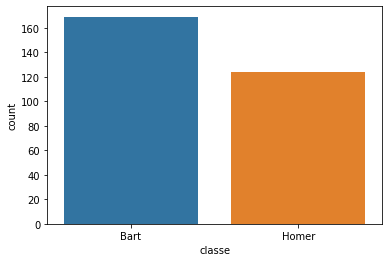

In [54]:
sns.countplot(x = 'classe', data=dataset)

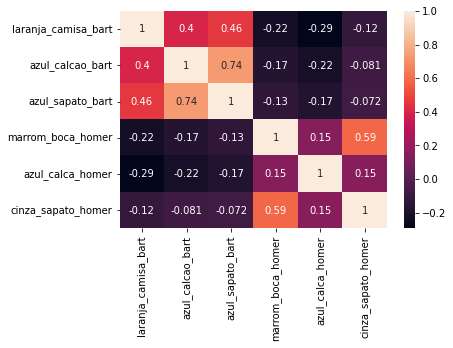

In [55]:
sns.heatmap(dataset.corr(), annot=True)

In [56]:
dataset.shape

(293, 7)

In [11]:
X = dataset.iloc[:, 0:6].values
X

array([[ 6.886102  ,  3.4952044 ,  1.4849836 ,  0.        ,  0.        ,
         0.06295441],
       [ 5.004901  ,  3.1838887 ,  1.0001415 ,  0.        ,  0.        ,
         0.03302354],
       [ 5.2646203 ,  5.0296826 ,  0.283567  ,  0.        ,  0.        ,
         0.15157256],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ,  4.2636285 ,
         0.07676148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.4291335 ,
         0.01701349],
       [ 0.        ,  0.        ,  0.        , 13.744248  ,  0.853902  ,
         0.0635462 ]])

In [21]:
y = dataset.iloc[:, 6].values
y

array(['Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
      

In [24]:
#y = (y == 'Homer')
#y
y1 = (y == 'Bart')
y1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [23]:
y2 = (y == 'Homer')
y2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [57]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2)

In [58]:
X_treinamento.shape, y_treinamento.shape

((234, 6), (234,))

In [59]:
X_teste.shape, y_teste.shape

((59, 6), (59,))

## Construção e treinamento da rede neural

In [30]:
(6 + 1) / 2

3.5

In [ ]:
# (entradas + saídas) / 2
# 6 -> 4 -> 4 -> 4 -> 1

In [60]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu', input_shape=(6,)))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [61]:
rede_neural.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Otimizador Adam
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

# Otimizador SGD
#rede_neural.compile(optimizer='sgd', loss='binary_crossentropy', metrics = ['accuracy'])

In [63]:
rede_neural.tf.strings.to_number(x, out_type=tf.float32)

AttributeError: ignored

In [64]:
#model.fit(X_train, y_train, nb_epoch=3, batch_size=16, verbose=1)
#historico = rede_neural.fit(X_treinamento, y_treinamento, epochs=50, validation_split=0.1)

historico = rede_neural.fit(X_treinamento, y_treinamento, epochs=3, validation_split=0.1)

Epoch 1/3


UnimplementedError: ignored

## Avaliação da rede neural

In [ ]:
historico.history.keys()

In [ ]:
plt.plot(historico.history['val_loss'])

In [ ]:
plt.plot(historico.history['val_accuracy'])

In [ ]:
previsoes = rede_neural.predict(X_teste)
previsoes

In [ ]:
# 1 True - Bart
# 0 False - Homer

In [ ]:
previsoes = (previsoes > 0.5)
previsoes

In [ ]:
y_teste

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, y_teste)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, previsoes)
cm

In [ ]:
sns.heatmap(cm, annot=True)